# Community Detection - Lab

## Introduction

In this lab, you'll once again work to cluster a network dataset. This time, you'll be investigating a meetup dataset for events occurring in Nashville.

## Objectives

You will be able to:
- Cluster a social network into subgroups

## Load the Dataset

To start, load the dataset `'nashville-meetup/group-edges.csv'` as a pandas Dataframe. 

In [1]:
#Your code here
import pandas as pd

groups = pd.read_csv('nashville-meetup/group-edges.csv')
groups.head()

Unnamed: 0    group1    group2  weight
0           0  19292162    535553       2
1           1  19292162  19194894       1
2           2  19292162  19728145       1
3           3  19292162  18850080       2
4           4  19292162   1728035       1

To add some descriptive data, import the file `'nashville-meetup/meta-groups.csv'`.

In [2]:
#Your code here
groups_meta = pd.read_csv('nashville-meetup/meta-groups.csv')
groups_meta.head()

group_id                                 group_name  num_members  \
0    339011                    Nashville Hiking Meetup        15838   
1  19728145           Stepping Out Social Dance Meetup         1778   
2   6335372                           Nashville soccer         2869   
3  10016242                                     NashJS         1975   
4  21174496  20's & 30's Women looking for girlfriends         2782   

   category_id         category_name  organizer_id             group_urlname  
0           23  Outdoors & Adventure       4353803          nashville-hiking  
1            5               Dancing     118484462    steppingoutsocialdance  
2           32   Sports & Recreation     108448302          Nashville-soccer  
3           34                  Tech       8111102                    nashjs  
4           31           Socializing     184580248  new-friends-in-Nashville

## Transform to a Network Representation

Take the Pandas DataFrame and transform it into a graph representation via NetworkX. Make nodes the names of the various groups within the Nashville area. The edges should be the weights between these groups.

In [3]:
#Your code here
import networkx as nx

group_dict = dict(zip(groups_meta.group_id, groups_meta.group_name))
G = nx.Graph()
for row in groups.index:
    g1 = group_dict[groups.group1[row]]
    g2 = group_dict[groups.group2[row]]
    weight = groups.weight[row]
    G.add_edge(g1, g2, weight=weight)

## Visualize the Network

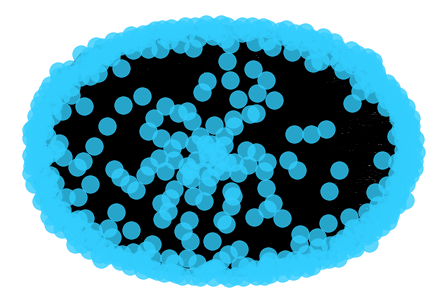

In [4]:
#Your code here
import matplotlib.pyplot as plt
%matplotlib inline

nx.draw(G, pos=nx.spring_layout(G, k=2, seed=10), alpha=0.8, node_color="#32cefe")

## Refine the Visual

As you should see, the initial visualization is a globular mess! Refine the visualization to better picture the center core of the  network.

In [5]:
#Your code here
for i in range(0, 100, 5):
    print("{}th Percentile: {}".format(i, groups.weight.quantile(q = i / 100)))

0th Percentile: 1.0
5th Percentile: 1.0
10th Percentile: 1.0
15th Percentile: 1.0
20th Percentile: 1.0
25th Percentile: 1.0
30th Percentile: 1.0
35th Percentile: 1.0
40th Percentile: 1.0
45th Percentile: 1.0
50th Percentile: 1.0
55th Percentile: 1.0
60th Percentile: 1.0
65th Percentile: 1.0
70th Percentile: 2.0
75th Percentile: 2.0
80th Percentile: 2.0
85th Percentile: 3.0
90th Percentile: 4.0
95th Percentile: 7.0


146

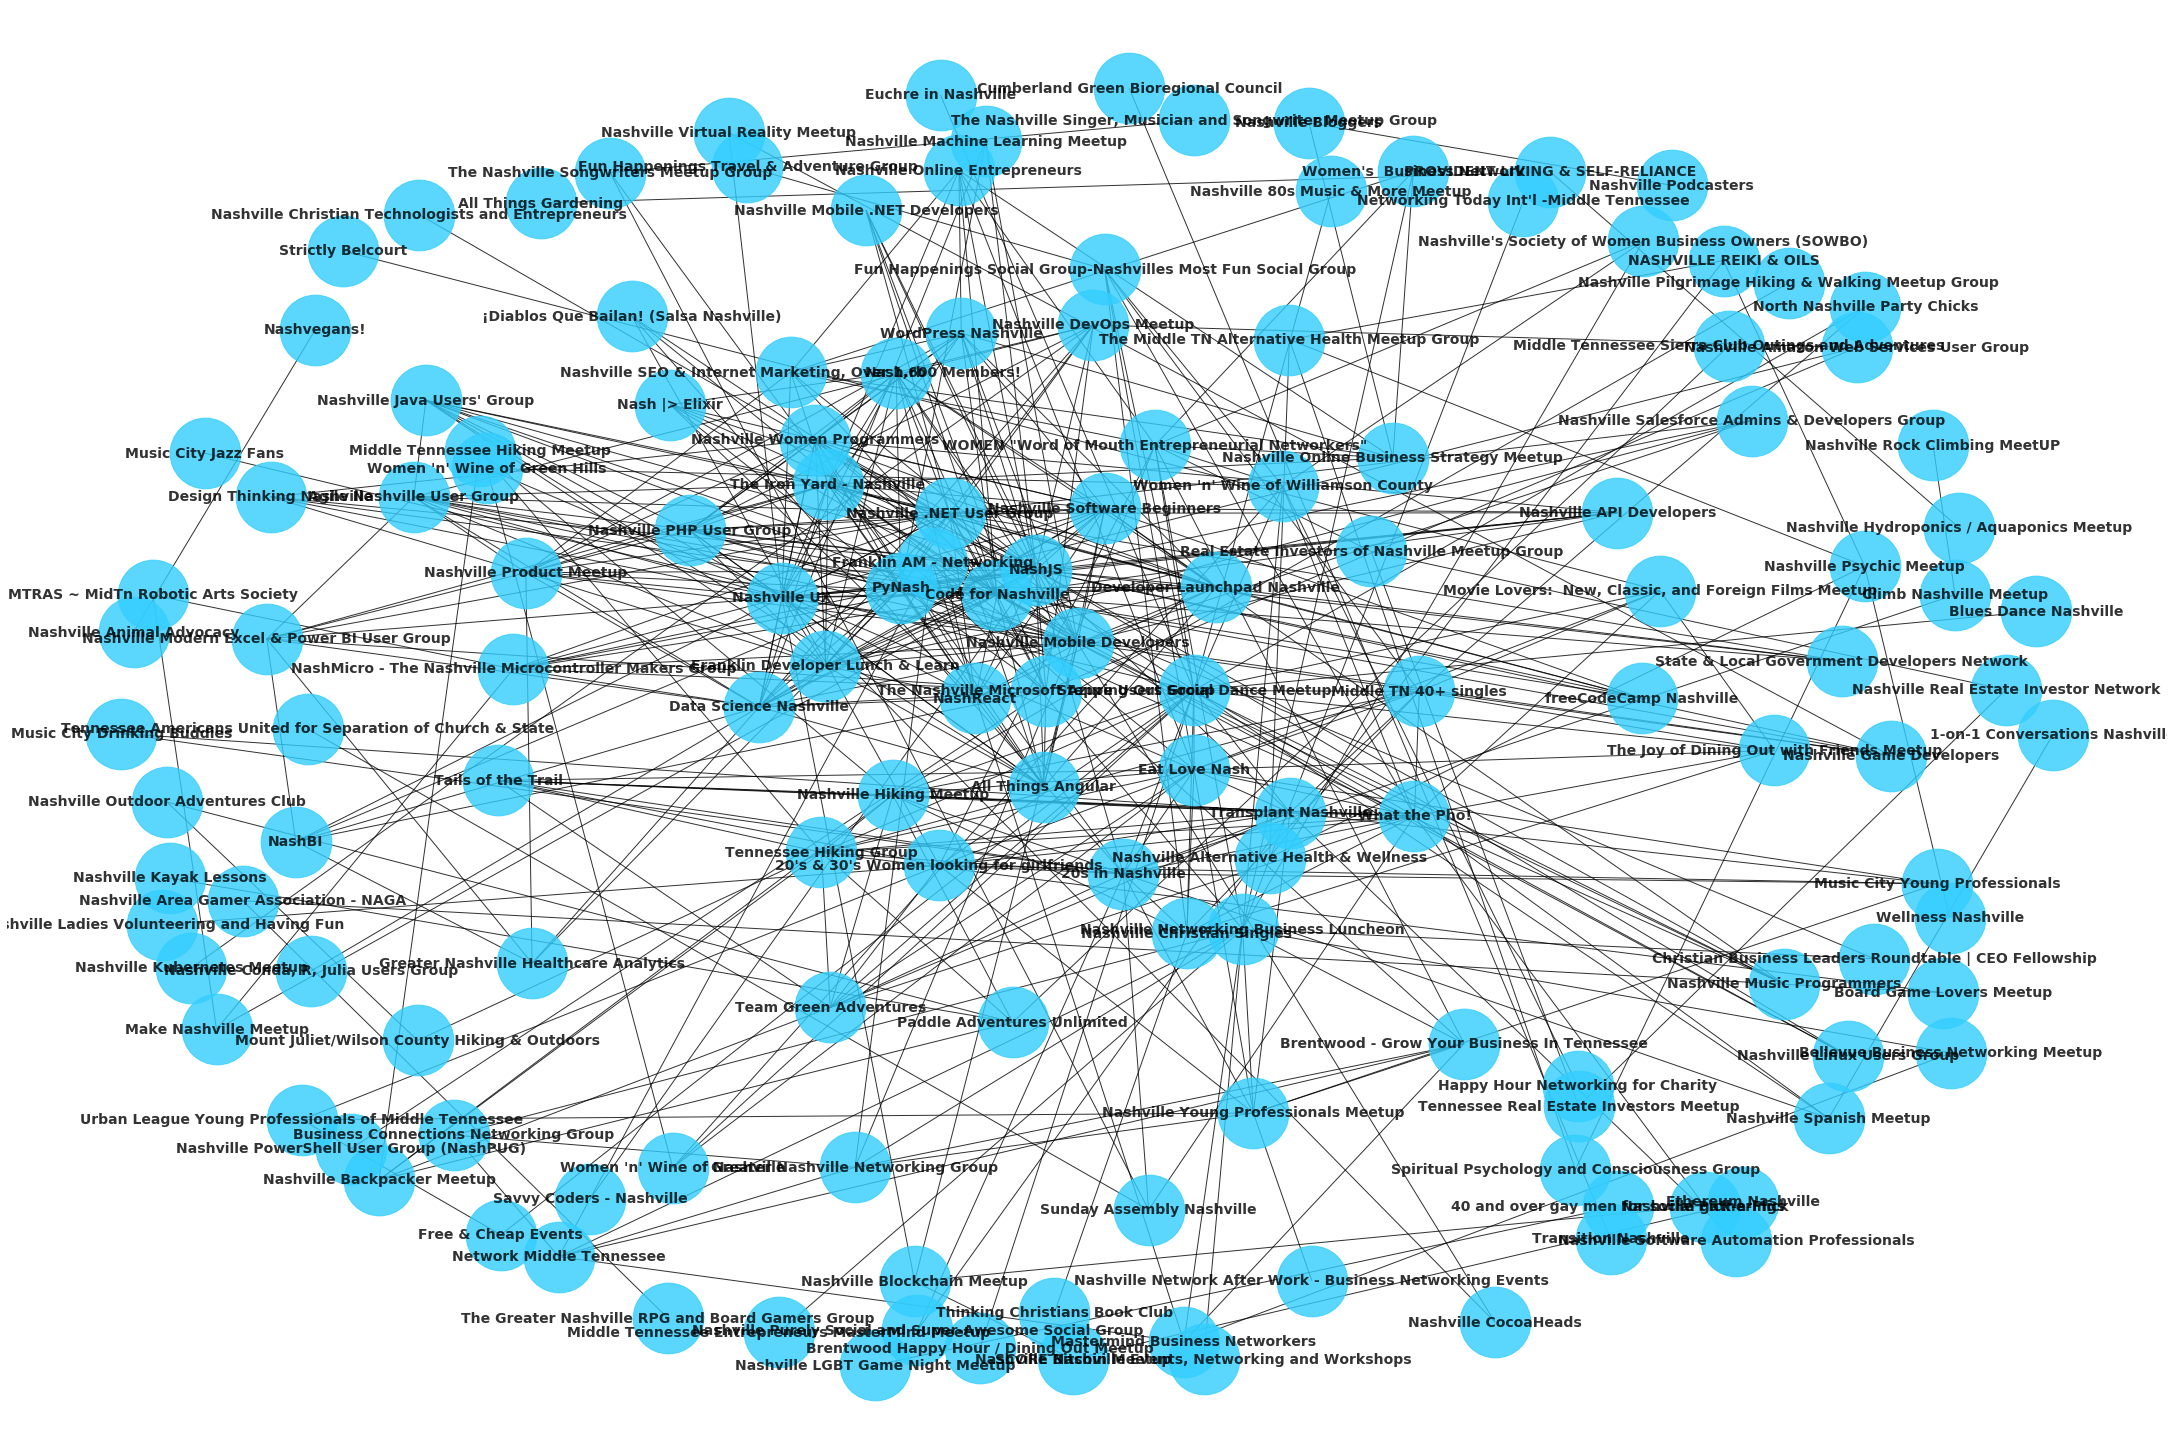

In [6]:
threshold = 5
G_subset = nx.Graph()
for row in groups.index:
    g1 = group_dict[groups.group1[row]]
    g2 = group_dict[groups.group2[row]]
    weight = groups.weight[row]
    if weight > threshold:
        G_subset.add_edge(g1, g2, weight=weight)
        
plt.figure(figsize=(30, 20))
nx.draw(G_subset, pos=nx.spring_layout(G_subset, k=2, seed=10), alpha=0.8, node_color="#32cefe", node_size=5000,
        with_labels=True, font_size=14, font_weight="bold")
len(G_subset)

## Try Clustering the Network

Now, that the dataset is a little more manageable, try clustering the remaining group nodes.

In [8]:
#Your code here
gn_clusters = list(nx.algorithms.community.centrality.girvan_newman(G_subset))
for n, clusters in enumerate(gn_clusters):
    print("Clusters after removing {} edges: {}".format(n, len(clusters)))

Clusters after removing 0 edges: 7
Clusters after removing 1 edges: 8
Clusters after removing 2 edges: 9
Clusters after removing 3 edges: 10
Clusters after removing 4 edges: 11
Clusters after removing 5 edges: 12
Clusters after removing 6 edges: 13
Clusters after removing 7 edges: 14
Clusters after removing 8 edges: 15
Clusters after removing 9 edges: 16
Clusters after removing 10 edges: 17
Clusters after removing 11 edges: 18
Clusters after removing 12 edges: 19
Clusters after removing 13 edges: 20
Clusters after removing 14 edges: 21
Clusters after removing 15 edges: 22
Clusters after removing 16 edges: 23
Clusters after removing 17 edges: 24
Clusters after removing 18 edges: 25
Clusters after removing 19 edges: 26
Clusters after removing 20 edges: 27
Clusters after removing 21 edges: 28
Clusters after removing 22 edges: 29
Clusters after removing 23 edges: 30
Clusters after removing 24 edges: 31
Clusters after removing 25 edges: 32
Clusters after removing 26 edges: 33
Clusters after

## Determine An Optimal Clustering Schema

Finally, determine a final clustering organization.

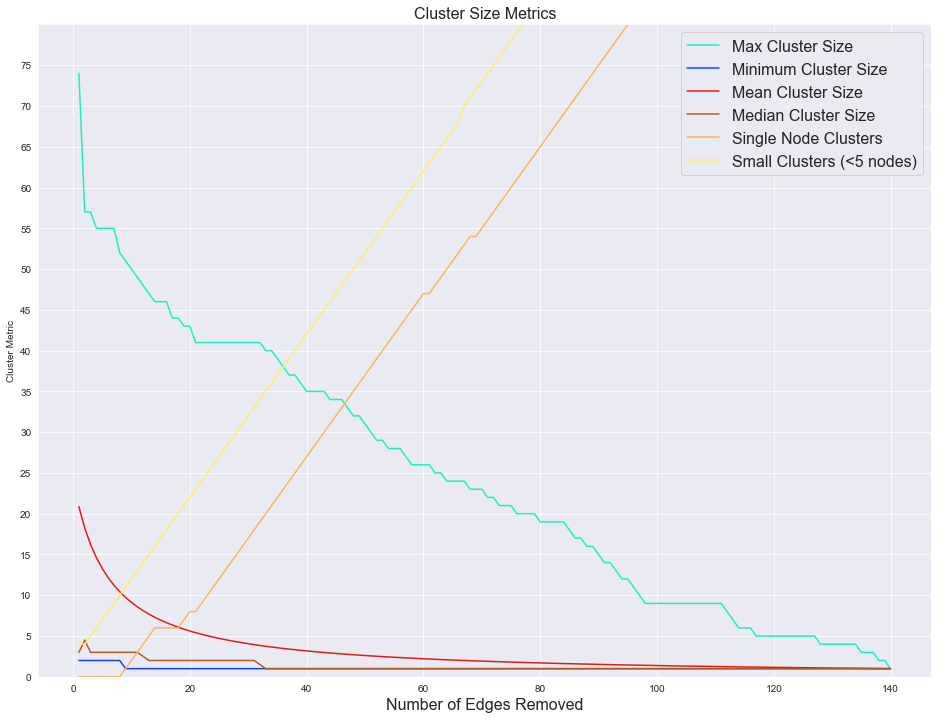

In [10]:
#Your code here
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

colors = ["#1cf0c7",
          "#1443ff",
          "#e31a1c",
          "#b15928",
          "#fdb462",
          "#ffed6f",
          "#80cdc1"]

fig = plt.figure(figsize=(16, 12))

x = [n+1 for n in range(len(gn_clusters))]

max_cluster_size = [max([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x, max_cluster_size, color=colors[0], label='Max Cluster Size')

min_cluster_size = [min([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x, min_cluster_size, color=colors[1], label='Minimum Cluster Size')

mean_cluster_size = [np.mean([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x, mean_cluster_size, color=colors[2], label='Mean Cluster Size')

median_cluster_size = [np.median([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x, median_cluster_size, color=colors[3], label='Median Cluster Size')

single_node_clusters = [sum([1 if len(c)==1 else 0 for c in cluster]) for cluster in gn_clusters]
plt.plot(x, single_node_clusters, color=colors[4], label='Single Node Clusters')

small_clusters = [sum([1 if len(c)<=5 else 0 for c in cluster]) for cluster in gn_clusters]
plt.plot(x,small_clusters, color=colors[5], label='Small Clusters (<5 nodes)')

plt.legend(fontsize=16)
plt.title('Cluster Size Metrics', fontsize=16)
plt.xlabel('Number of Edges Removed', fontsize=16)
plt.ylabel('Cluster Metric')
plt.ylim(0, 80)
plt.yticks(ticks=list(range(0, 80, 5)))
plt.show()

## Visualize the Clusters

Analyze the output of your clustering schema. Do any clusters of groups stand out to you?

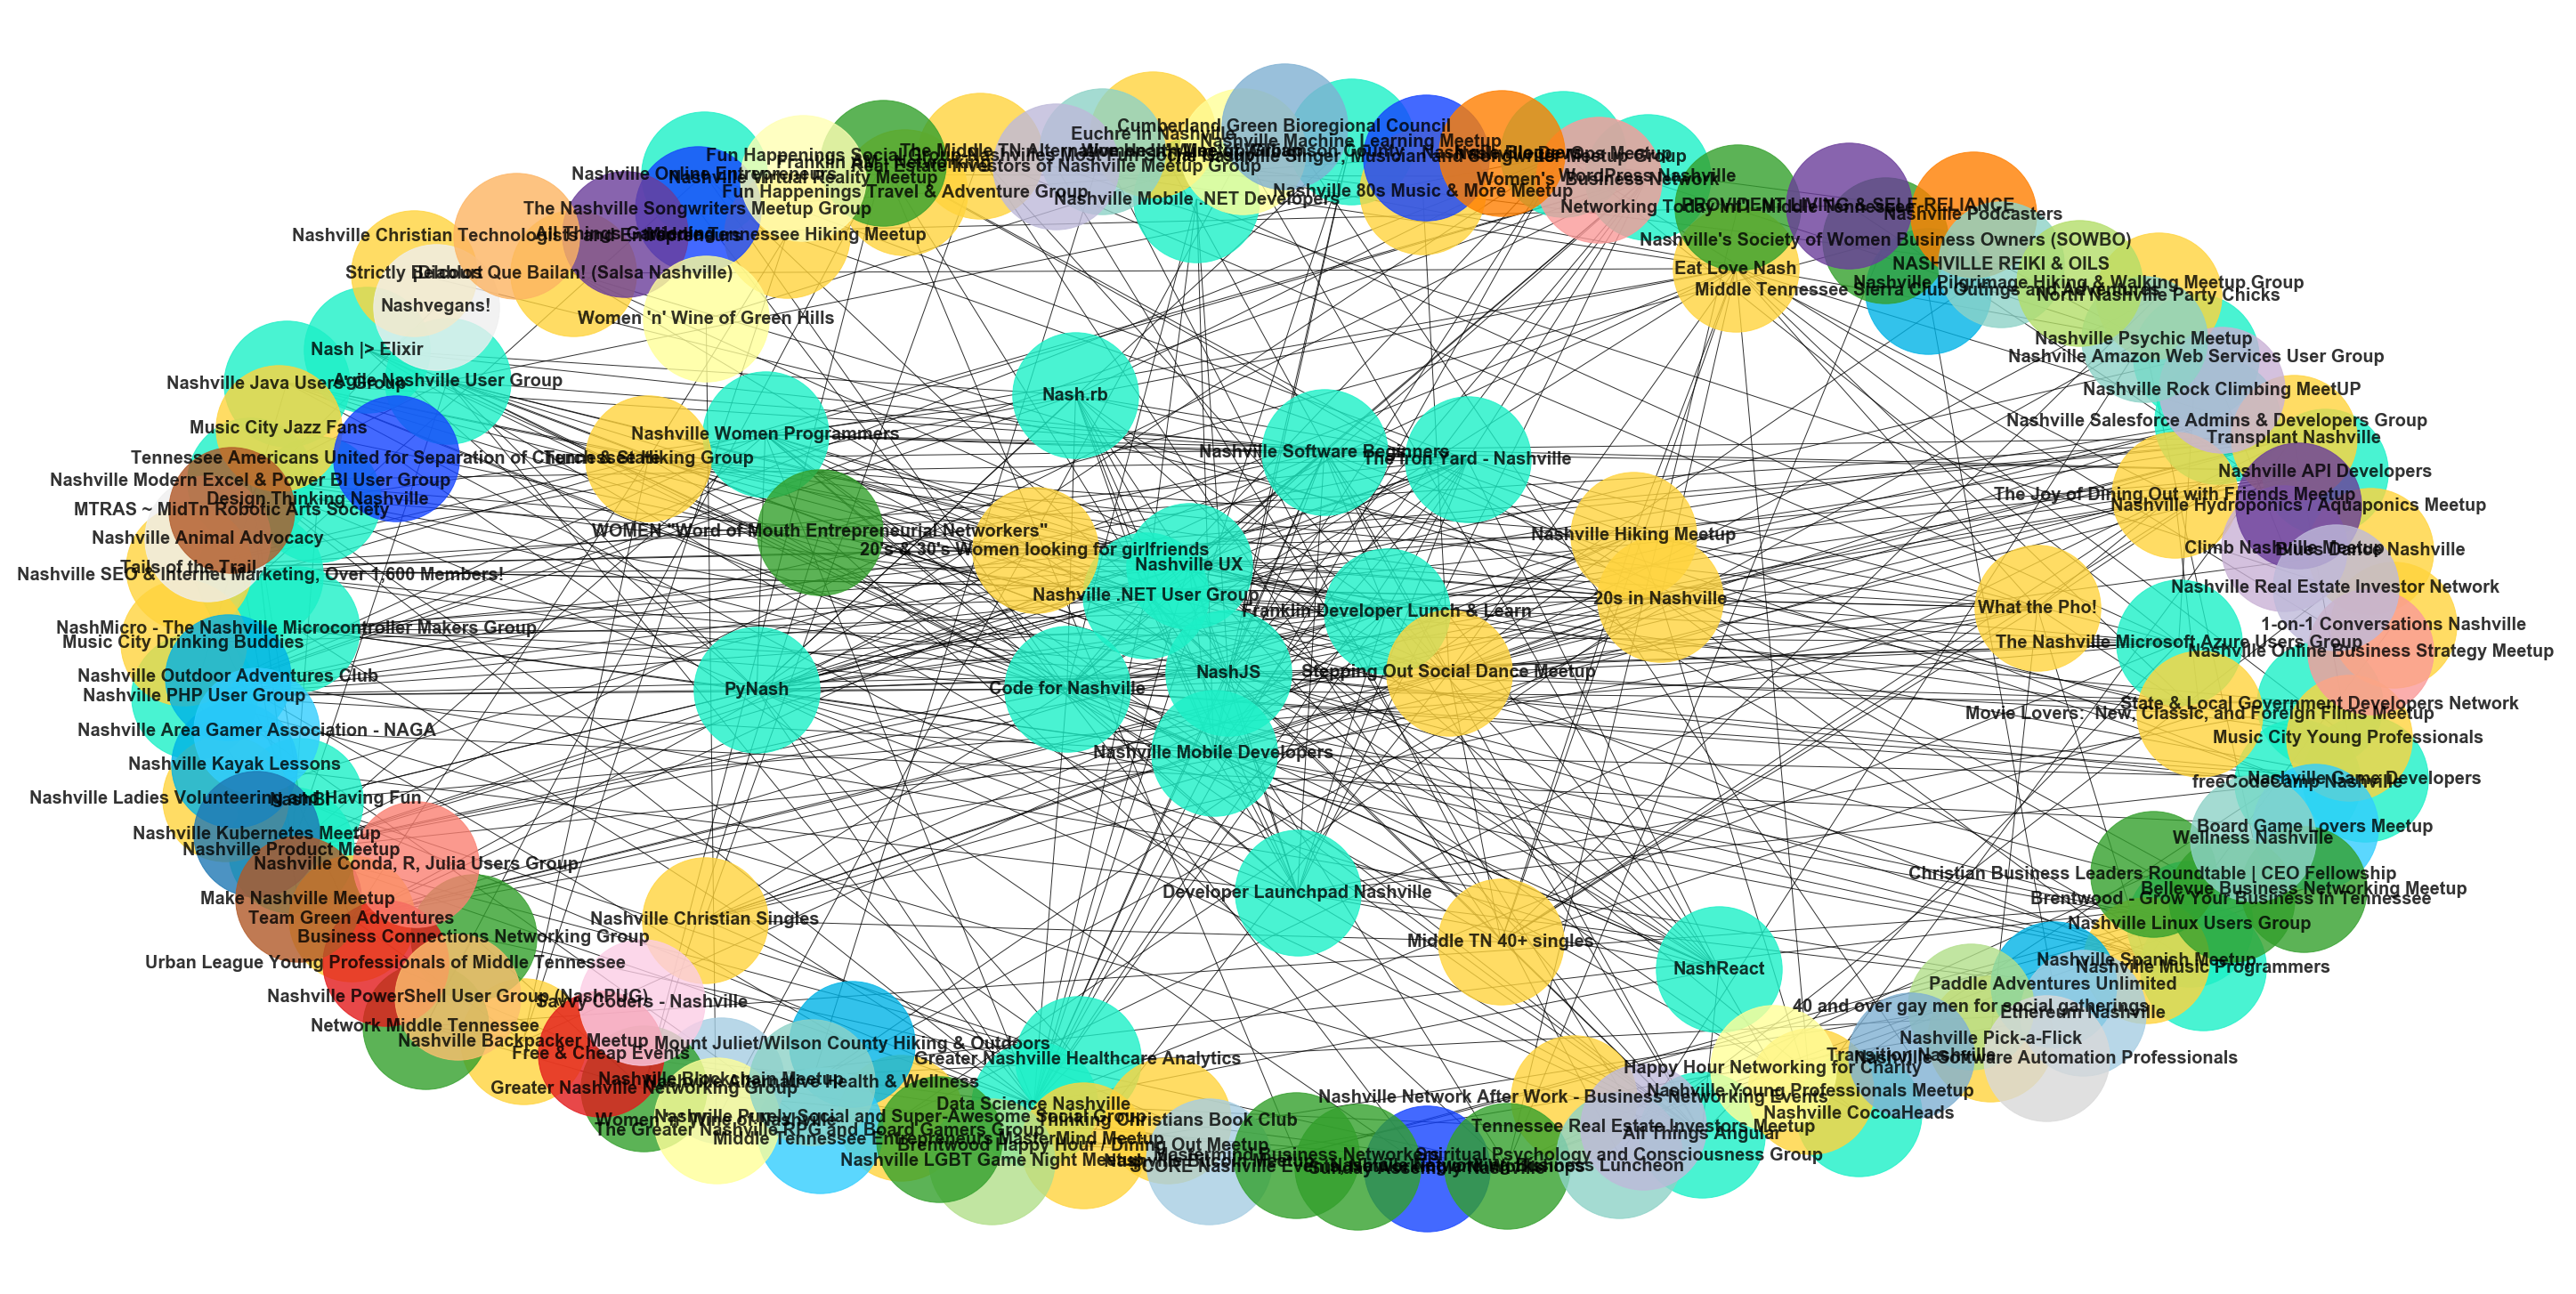

Cluster1  \
0                                  All Things Angular   
1                            Nashville PHP User Group   
2                            Nashville API Developers   
3                                 WordPress Nashville   
4                                              NashBI   
5   NashMicro - The Nashville Microcontroller Make...   
6                         Nashville Women Programmers   
7                                             Nash.rb   
8   Nashville SEO & Internet Marketing, Over 1,600...   
9                         Nashville Mobile Developers   
10                      Developer Launchpad Nashville   
11             Greater Nashville Healthcare Analytics   
12                        Nashville Linux Users Group   
13       Nashville Modern Excel & Power BI User Group   
14                          Nashville Game Developers   
15                             Data Science Nashville   
16                           Nashville Product Meetup   
17           Nashville Amazon Web Services User Group   
18                                       Nashville UX   
19                        Nashville Music Programmers   
20                                          NashReact   
21                     Nashville Online Entrepreneurs   
22                                             PyNash   
23                                             NashJS   
24     Nashville Salesforce Admins & Developers Group   
25        State & Local Government Developers Network   
26                            Nashville DevOps Meetup   
27          The Nashville Microsoft Azure Users Group   
28                   Nashville Mobile .NET Developers   
29                       Nashville Software Beginners   
30                               Nashville CocoaHeads   
31                          Design Thinking Nashville   
32                          The Iron Yard - Nashville   
33                  Nashville Machine Learning Meetup   
34                             freeCodeCamp Nashville   
35                                 Code for Nashville   
36                         Agile Nashville User Group   
37                   Franklin Developer Lunch & Learn   
38                          Nashville .NET User Group   
39                        Nashville Java Users' Group   
40                                     Nash |> Elixir   

                                             Cluster2  \
0                         Nashville Christian Singles   
1            Brentwood Happy Hour / Dining Out Meetup   
2             Fun Happenings Travel & Adventure Group   
3                      Middle Tennessee Hiking Meetup   
4   Movie Lovers:  New, Classic, and Foreign Films...   
5                              Nashville Pick-a-Flick   
6        Nashville Ladies Volunteering and Having Fun   
7   Fun Happenings Social Group-Nashvilles Most Fu...   
8                            Nashville Spanish Meetup   
9                   Nashville 80s Music & More Meetup   
10             ¡Diablos Que Bailan! (Salsa Nashville)   
11                            Nashville Hiking Meetup   
12                                Euchre in Nashville   
13                      Thinking Christians Book Club   
14                     1-on-1 Conversations Nashville   
15                   Stepping Out Social Dance Meetup   
16                                  Strictly Belcourt   
17                             Tennessee Hiking Group   
18                        Music City Drinking Buddies   
19          20's & 30's Women looking for girlfriends   
20                              Team Green Adventures   
21  Nashville Purely Social and Super-Awesome Soci...   
22                     Music City Young Professionals   
23                       North Nashville Party Chicks   
24                                      Eat Love Nash   
25                               Transplant Nashville   
26                               Music City Jazz Fans   
27               Nashville Young Professionals Meetup 

In [11]:
#Your code here
def plot_girvan_newman(G, clusters):
    sns.set_style('white')
    fig = plt.figure(figsize=(40, 20))
    colors = ["#1cf0c7","#ffd43d","#00b3e6","#32cefe","#efefef",
          "#1443ff","#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99",
          "#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99",
          "#b15928","#8dd3c7","#ffffb3","#bebada","#fb8072","#80b1d3",
          "#fdb462","#b3de69","#fccde5","#d9d9d9","#bc80bd","#ccebc5",
          "#ffed6f","#bf812d","#dfc27d","#f6e8c3","#f5f5f5","#c7eae5",
          "#80cdc1", "#35978f", "#01665e", "#003c30"]
    for n, c in enumerate(clusters):
        ci = G.subgraph(c)
        nx.draw(ci, pos=nx.spring_layout(G_subset, k=4, seed=10), with_labels=True, node_color=colors[n], alpha=0.8, 
                node_size=20000, font_weight="bold", font_size=20)
    plt.show()

plot_girvan_newman(G_subset, gn_clusters[20])

clusters = pd.DataFrame(gn_clusters[20]).transpose()
clusters.columns = ["Cluster{}".format(i) for i in range(1, len(clusters.columns)+1)]
clusters

In [ ]:
# Some of the cluster groups do stand out to me:
# For example,
# Cluster 1 contains technology groups (with programming and langauge indicators like 'data', 'developers', 'linux', etc),
# Cluster 2 contains general social groups (with words like 'social', 'buddies', 'women', 'fans', etc),
# Cluster 3 contains outdoors groups,
# Cluster 4 contains gaming groups,
# Cluster 5 contains animal advocacy groups,
# Cluster 6 contains music groups,
# Cluster 7 contains blockchain groups,
# Cluster 8 contains a Kubernetes group,
# Cluster 9 contains LGBT groups,
# Cluster 10 contains business groups.

## Summary

In this lab, you got another chance to practice your network clustering skills, investigating a meetup dataset of events and groups surrounding the Nashville area. If you're up for the challenge, feel free to continue investigating the dataset and trying to cluster users or events!                                                                                                                                                               